In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
csv_file_path = 'csv/xgboost_learning_curve.csv'
df = pd.read_csv(csv_file_path)

# Transpose the DataFrame and set the first row as the header
df_transposed = df.transpose()
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:]

In [2]:
display(df_transposed)

Time,accuracy,kappa,weighted_mean_recall,weighted_mean_precision,spearman_rho,kendall_tau,absolute_error,relative_error,relative_error_lenient,relative_error_strict,normalized_absolute_error,root_mean_squared_error,root_relative_squared_error,squared_error,correlation,squared_correlation,cross-entropy,margin,soft_margin_loss,logistic_loss
3,90.64%,0.667,80.17%,87.92%,0.677,0.677,0.160 +/- 0.218,16.01% +/- 21.76%,16.01% +/- 21.76%,65.19% +/- 247.69%,0.834,0.270 +/- 0.000,1.407,0.073 +/- 0.183,0.677,0.458,0.364,0.030,0.160,0.364
6,91.02%,0.680,80.79%,88.70%,0.690,0.690,0.157 +/- 0.220,15.67% +/- 22.01%,15.67% +/- 22.01%,69.93% +/- 278.53%,0.816,0.270,1.408,0.073 +/- 0.186,0.690,0.477,0.364,0.026,0.157,0.363
9,90.67%,0.668,80.26%,87.96%,0.678,0.678,0.155 +/- 0.219,15.53% +/- 21.95%,15.53% +/- 21.95%,67.76% +/- 282.43%,0.809,0.269 +/- 0.000,1.400,0.072 +/- 0.182,0.678,0.459,0.357,0.028,0.155,0.363
12,90.38%,0.656,79.63%,87.50%,0.667,0.667,0.156 +/- 0.223,15.58% +/- 22.26%,15.58% +/- 22.26%,66.00% +/- 264.45%,0.811,0.272 +/- 0.000,1.415,0.074 +/- 0.185,0.667,0.444,0.360,0.023,0.156,0.363
15,89.40%,0.623,78.27%,85.33%,0.632,0.632,0.155 +/- 0.227,15.49% +/- 22.66%,15.49% +/- 22.66%,73.39% +/- 301.76%,0.807,0.274 +/- 0.000,1.430,0.075 +/- 0.190,0.632,0.400,0.368,0.021,0.155,0.363
18,90.00%,0.643,79.05%,86.72%,0.653,0.653,0.152 +/- 0.226,15.25% +/- 22.60%,15.25% +/- 22.60%,72.98% +/- 314.53%,0.794,0.273 +/- 0.000,1.420,0.074 +/- 0.189,0.653,0.427,0.362,0.019,0.152,0.362
21,90.14%,0.648,79.29%,86.96%,0.658,0.658,0.157 +/- 0.228,15.65% +/- 22.75%,15.65% +/- 22.75%,75.74% +/- 317.99%,0.815,0.276 +/- 0.000,1.439,0.076 +/- 0.192,0.658,0.433,0.373,0.020,0.157,0.364
24,90.17%,0.643,78.53%,87.84%,0.657,0.657,0.155 +/- 0.225,15.48% +/- 22.51%,15.48% +/- 22.51%,72.51% +/- 306.34%,0.806,0.273 +/- 0.000,1.423,0.075 +/- 0.188,0.657,0.432,0.365,0.021,0.155,0.363


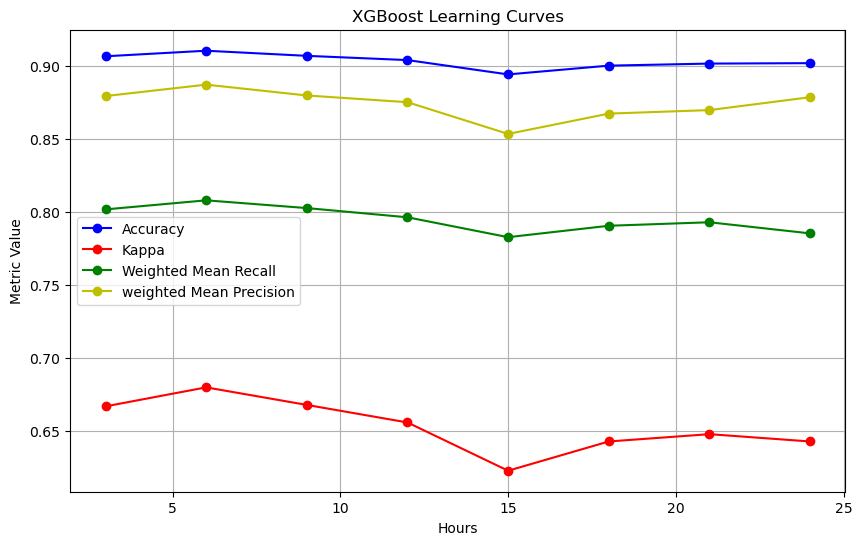

In [3]:
# Extracting the relevant columns
time = df_transposed.index.astype(int)
accuracy = df_transposed['accuracy'].str.rstrip('%').astype('float') / 100.0
kappa = df_transposed['kappa'].astype('float')
weighted_mean_recall = df_transposed['weighted_mean_recall'].str.rstrip('%').astype('float') / 100.0
weighted_mean_precision = df_transposed['weighted_mean_precision'].str.rstrip('%').astype('float') / 100.0

# Plotting the learning curves for multiple metrics
plt.figure(figsize=(10, 6))

plt.plot(time, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(time, kappa, marker='o', linestyle='-', color='r', label='Kappa')
plt.plot(time, weighted_mean_recall, marker='o', linestyle='-', color='g', label='Weighted Mean Recall')
plt.plot(time, weighted_mean_precision, marker='o', linestyle='-', color='y', label='weighted Mean Precision')

plt.title('XGBoost Learning Curves')
plt.xlabel('Hours')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)

# Save the plot in high resolution (adjust the dpi as needed)
plt.savefig('learning_curve.png', dpi=300)

plt.show()